# Loan Default Prediction

Financial inclusion has expanded access to banking services. The main function of banks is to lend money to borrowers using money saved by depositors. 

In deciding who to lend to, banks need to assess these borrowers based on traits and historical performance of their previous borrowings. This type of assessment is captured in the C's of credit. 

In [18]:
import pandas as pd

loandef = pd.read_csv('Default_Fin.csv')

In [19]:
#Let's see what we have in the data
loandef.head(2)

,Index,Employed,Bank Balance,AnnualSalary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0


In [21]:
#we don't need the index loaded with the csv
# comment out the code below once completed so we do not clash with data.head()
#loandef.drop('Index',axis=1,inplace=True) 
# so we can see column index have been taken out when we rerun the code below
loandef.head()

,Employed,Bank Balance,AnnualSalary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [22]:
loandef.isna().sum()

Employed        0
Bank Balance    0
AnnualSalary    0
Defaulted?      0
dtype: int64

In [23]:
loandef.shape

(10000, 4)

In [24]:
loandef.Employed.value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [25]:
#use describe() to see summary statistics of numeric columns
loandef.describe()

,Employed,Bank Balance,AnnualSalary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [26]:
loandef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employed      10000 non-null  int64  
 1   Bank Balance  10000 non-null  float64
 2   AnnualSalary  10000 non-null  float64
 3   Defaulted?    10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [54]:
# I used the code below to change column names
loandef.rename(columns={"AnnualSalary" :"Annual_Salary"})

,Employed,Bank Balance,Annual_Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [55]:
# I used the code below to change column names
loandef.rename(columns={"Defaulted?" :"Defaulted"})

,Employed,Bank Balance,AnnualSalary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


<AxesSubplot:>

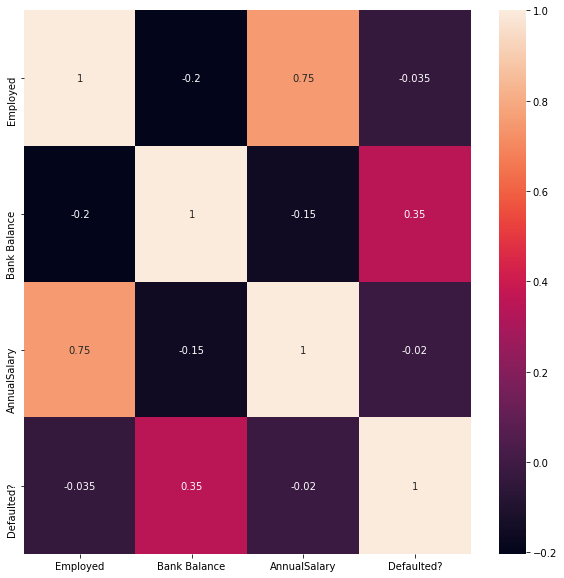

In [28]:
# this helps us to see the relationship that exist
#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(loandef.corr(),annot=True)


## Select Target

Your target is the column you want to predict.

#### TODO: select Defaulted? column as y
> Ensure that the question mark (?) in the column name does not cause errors. Hint: use square brackets to select the column

In [57]:
loandef.rename(columns={"Defaulted?" :"Defaulted"})

,Employed,Bank Balance,AnnualSalary,Defaulted
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [29]:
#your code here:
#choose your target variable. Normally we call it y what you want to predict
#The code is written in another way as this to select the column name when the data is awkward or with special symbols as below
y = loandef['Defaulted?']


In [30]:
y.head(2)

0    0
1    0
Name: Defaulted?, dtype: int64

## Select Features

#### TODO: use other columns as features except Defaulted? column

In [34]:
#view the list of all columns
loandef.columns

Index(['Employed', 'Bank Balance', 'AnnualSalary', 'Defaulted?'], dtype='object')

In [37]:
#loandef.select_dtypes(exclude=objects).columns

In [38]:
#one way to select all columns except one of them is to simply drop the one you don't want
X = loandef.drop('Defaulted?', axis=1)

In [39]:
# Code below helps review the data after droping the column set as Y by showing the first two line
X.head(2)

,Employed,Bank Balance,AnnualSalary
0,1,8754.36,532339.56
1,0,9806.16,145273.56


## Create train and test datasets

Split your data set into a train and test set. Your test set will be used to evaluate the trained model.

In [41]:
#use train_test_split to divide the dataset into train and test datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#### TODO: create X_train, X_test, y_train, y_test using test_size of 30%
> Your code will look like this:

> `df_features_for_train, df_features_for_test, series_target_for_train, series_target_for_test = train_test_split(df_features, series_target, test_size=0.3)`

>Your may refer your notes or sklearn documentation

In [43]:
#your code here

#create an instance of the model specify a seed of randomness(randomstate =42)to enable us get thesame result
loandefmodel = DecisionTreeRegressor(random_state=42)

In [44]:
#df_features_for_train, df_features_for_test, series_target_for_train, series_target_for_test = train_test_split(df_features, series_target, test_size=0.3)
#split your data into training and testing sets
# 70:30, 60:40 are common splits

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [45]:
print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


       Employed  Bank Balance  AnnualSalary
803          1      22831.32     640728.96
1387         1       7977.84     394737.60

       Employed  Bank Balance  AnnualSalary
6676         1       2139.36     427391.16
6421         1      21666.72     481437.48

 803     1
1387    0
Name: Defaulted?, dtype: int64

 6676    0
6421    1
Name: Defaulted?, dtype: int64


## Train Your Classification Model With A Decision Tree Classifier

In [46]:
#import the decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier

#### TODO: create the model
> your code should look like `model_name = selected_algorithm_name()`

#### TODO: fit the model
> Your code should look like `model.fit(train_set, train_target)`

In [47]:
#retrain model
#loandefmodel
loandefmodel.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

#### TODO: create your predictions
> Your code should look like `predictions = model.predict(test_set)`

In [48]:
#your code here
#predict on the test data
preds2 = loandefmodel.predict(X_test)

In [49]:
#Your code here
print('Actual Defaulted:', y.head().tolist())
print('Predicted Defaulted:', preds2[:5])


Actual Defaulted: [0, 0, 0, 0, 0]
Predicted Defaulted: [0. 0. 0. 0. 0.]


In [102]:
# Evaluate mean absolute error
# note we cannot use this model because data to be predicted is categorical
from sklearn.metrics import mean_absolute_error

#mae2 = mean_absolute_error(y,preds2)
#print(mae2)


## Score Your Decision Tree Model

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
print(accuracy_score(preds2,y_test))

0.959


### What is the accuracy score of your decision tree model?

## Train Your Classification Model With A Random Forest Classifier

In [55]:
#import the random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [56]:
#TODO: create the model
RF_model = RandomForestClassifier()
RF_model 

RandomForestClassifier()

In [58]:
#fit the model
# Note the X is capital

RF_model.fit(X_train,y_train)


RandomForestClassifier()

In [59]:
#create your predictions
RF_preds = RF_model.predict(X_test)

## Score Your Random Forest Model

In [60]:
#import the accuracy_score metric
from sklearn.metrics import accuracy_score

In [61]:
print(accuracy_score(RF_preds,y_test))

0.9723333333333334


In [62]:

from sklearn.metrics import classification_report

In [63]:
print(classification_report(RF_preds,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2955
           1       0.30      0.62      0.40        45

    accuracy                           0.97      3000
   macro avg       0.65      0.80      0.69      3000
weighted avg       0.98      0.97      0.98      3000



### What is the accuracy score of your random forest model?

In [ ]:
#your answer here


* accuracy
* precision
* recall

### What are some advantages of a Random Forest over a Decision Tree?

In [ ]:
#your answer here


### Business understanding: what are some other features that can be added to this dataset to meet requirements of the 5 C's of credit

**With the loan default data set**

Train 2 additional models apart from decision trees and random forest which you have already used.

Some options:
1. Logistic Regression
2. KNeighbors
3. Support Vector Machines
etc

Compare all 4 models that you have now trained.

1. Which one gave the best accuracy?
2. Which one gave the best recall?
3. For a loan default prediction, should we be more worried about lending to bad customers or rejecting good customers?

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
k_model = KNeighborsClassifier()

In [88]:
k_model.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
k_preds=k_model.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(k_preds,y_test))

0.9726666666666667


In [92]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test, k_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2906
           1       0.64      0.29      0.40        94

    accuracy                           0.97      3000
   macro avg       0.81      0.64      0.69      3000
weighted avg       0.97      0.97      0.97      3000



In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

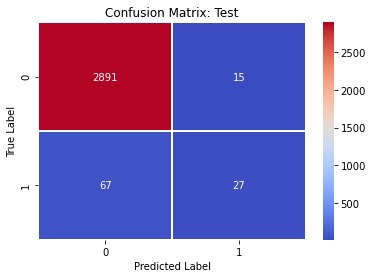

In [96]:
cm_ = confusion_matrix(y_test, k_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [71]:
#logistic regression expects data to be scaled
#import StandardScaler
from sklearn.preprocessing import StandardScaler

## What is the importance of scaling data?

In [ ]:
#your answer here:


In [98]:
#data scaling steps for train data set
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

In [99]:
#data scaling test for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
#initialize the logistic regression model
LR = LogisticRegression()

In [102]:
#train the model
LR.fit(X_train,y_train)

LogisticRegression()

In [103]:
#predict and store your predictions to a variable
LR_preds = LR.predict(X_test)

In [104]:
#import classification report so we view multiple classification metrics
from sklearn.metrics import classification_report

In [105]:
#print classification report
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2970
           1       0.27      0.83      0.40        30

    accuracy                           0.98      3000
   macro avg       0.63      0.91      0.70      3000
weighted avg       0.99      0.98      0.98      3000



In [76]:
from sklearn.svm import SVC

In [77]:
svec= SVC()

In [78]:
svec.fit(X_train,y_train)

SVC()

In [79]:
svec_preds= svec.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,svec_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2906
           1       0.90      0.19      0.32        94

    accuracy                           0.97      3000
   macro avg       0.94      0.60      0.65      3000
weighted avg       0.97      0.97      0.97      3000



In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

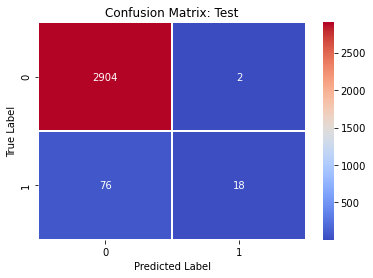

In [84]:

cm_ = confusion_matrix(y_test, svec_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
